# CLASSIFICATION USING LE-NET ARCHITECTURE IN KERAS

## Understanding LE-NET ARCHITECTURE

LeNet-5 is a convolutional neural network (CNN) architecture that was developed by Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner. 

It is one of the pioneering CNN architectures and played a significant role in the development of deep learning and convolutional neural networks for image classification tasks. 

LeNet-5 was originally designed for handwritten digit recognition, specifically for recognizing characters on checks and other documents.

1. Input Layer: The network takes grayscale images of size 32x32 pixels as input. These images are typically normalized to have pixel values in the range  [0, 1].


2. Convolutional Layer 1: The first convolutional layer applies six filters (also known as kernels) of size 5x5 to the input image. This results in six feature maps, each capturing different patterns or features in the input image.


3. Average Pooling Layer 1: This layer performs average pooling on each of the feature maps generated by the first convolutional layer. The pooling is done using a 2x2 window with a stride of 2, which reduces the spatial dimensions of the feature maps by half.


4. Convolutional Layer 2: The second convolutional layer applies sixteen 5x5 filters to the output of the first pooling layer. This produces sixteen new feature maps.


5. Average Pooling Layer 2: Similar to the first pooling layer, the second pooling layer performs average pooling using a 2x2 window with a stride of 2.


6. Flatten Layer: The output of the second pooling layer is flattened into a 1D vector. This vector serves as the input to the fully connected layers.


7. Fully Connected Layer 1: This layer has 120 neurons and is fully connected to the flattened output of the previous layer. It applies a traditional fully connected operation followed by a non-linear activation function, typically a sigmoid or hyperbolic tangent (tanh) function.


8. Fully Connected Layer 2: This layer has 84 neurons and is also fully connected to the previous layer. Similarly, it applies a non-linear activation function.


9. Output Layer: The final fully connected layer has 10 neurons, each corresponding to one of the possible digits (0 to 9). It uses a softmax activation function to produce the probability distribution over the classes.

LeNet-5 is a very efficient convolutional neural network for handwritten character recognition.


Convolutional neural networks can make good use of the structural information of images.


The convolutional layer has fewer parameters, which is also determined by the main characteristics of the convolutional layer, that is, local connection and shared weights.

## Basic Code Implementation for LE-NET 5

In [1]:
# Importing necessary libraries
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

### Load Dataset

In [4]:
# Loading the dataset and perform splitting
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


### Image Data Preprocessing

In [5]:
# Peforming reshaping operation
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
y_train.shape

(60000, 10)

In [9]:
x_test.shape

(10000, 28, 28, 1)

In [10]:
y_test.shape

(10000, 10)

### LeNet Model Architecture

In [13]:
# Building the Model Architecture
model = Sequential()
# Select 6 feature convolution kernels with a size of 5 * 5 (without offset), and get 66 feature maps. The size of each feature map is 32−5 + 1 = 2832−5 + 1 = 28.
# That is, the number of neurons has been reduced from 10241024 to 28 ∗ 28 = 784 28 ∗ 28 = 784.
# Parameters between input layer and C1 layer: 6 ∗ (5 ∗ 5 + 1)
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
# The input of this layer is the output of the first layer, which is a 28 * 28 * 6 node matrix.
# The size of the filter used in this layer is 2 * 2, and the step length and width are both 2, so the output matrix size of this layer is 14 * 14 * 6.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 14 * 14 * 6, the filter size used is 5 * 5, and the depth is 16. This layer does not use all 0 padding, and the step size is 1.
# The output matrix size of this layer is 10 * 10 * 16. This layer has 5 * 5 * 6 * 16 + 16 = 2416 parameters
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# The input matrix size of this layer is 10 * 10 * 16. The size of the filter used in this layer is 2 * 2, and the length and width steps are both 2, so the output matrix size of this layer is 5 * 5 * 16.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 5 * 5 * 16. This layer is called a convolution layer in the LeNet-5 paper, but because the size of the filter is 5 * 5, #
# So it is not different from the fully connected layer. If the nodes in the 5 * 5 * 16 matrix are pulled into a vector, then this layer is the same as the fully connected layer.
# The number of output nodes in this layer is 120, with a total of 5 * 5 * 16 * 120 + 120 = 48120 parameters.
model.add(Flatten())
model.add(Dense(120, activation='relu'))
# The number of input nodes in this layer is 120 and the number of output nodes is 84. The total parameter is 120 * 84 + 84 = 10164 (w + b)
model.add(Dense(84, activation='relu'))
# The number of input nodes in this layer is 84 and the number of output nodes is 10. The total parameter is 84 * 10 + 10 = 850
model.add(Dense(10, activation='softmax'))


In [15]:
model

In [16]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 20s 38ms/step - loss: 0.3553 - accuracy: 0.8936 - val_loss: 0.1723 - val_accuracy: 0.9466
Epoch 2/20
469/469 [==============================] - 17s 35ms/step - loss: 0.1029 - accuracy: 0.9686 - val_loss: 0.0719 - val_accuracy: 0.9773
Epoch 3/20
469/469 [==============================] - 15s 33ms/step - loss: 0.0710 - accuracy: 0.9780 - val_loss: 0.0530 - val_accuracy: 0.9829
Epoch 4/20
469/469 [==============================] - 15s 32ms/step - loss: 0.0557 - accuracy: 0.9831 - val_loss: 0.0421 - val_accuracy: 0.9863
Epoch 5/20
469/469 [==============================] - 16s 35ms/step - loss: 0.0455 - accuracy: 0.9859 - val_loss: 0.0377 - val_accuracy: 0.9884
Epoch 6/20
469/469 [==============================] - 15s 32ms/step - loss: 0.0400 - accuracy: 0.9874 - val_loss: 0.0434 - val_accuracy: 0.9847
Epoch 7/20
469/469 [==============================] - 17s 35ms/step - loss: 0.0352 - accuracy: 0.9890 - val_loss: 0.0373 - val_accuracy:

In [23]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 5s 15ms/step - loss: 0.0471 - accuracy: 0.9883
Test Loss: 0.04711113125085831
Test accuracy: 0.9883000254631042


In [19]:
from keras.utils import plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

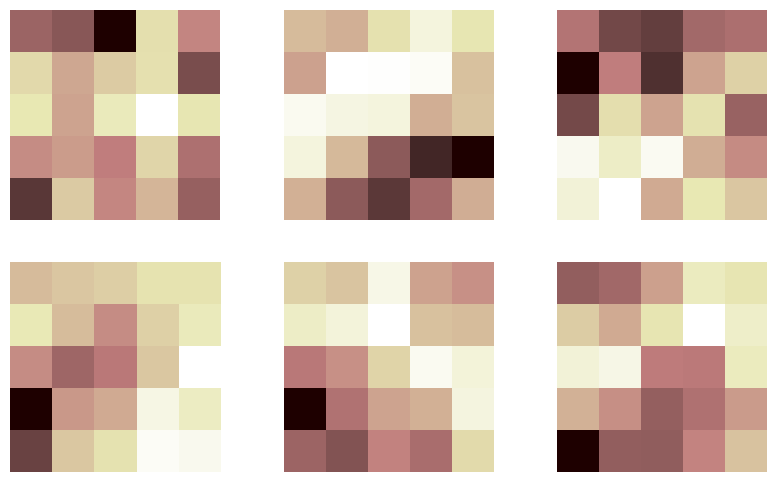

In [22]:
import matplotlib.pyplot as plt

filters_layer = model.layers[0]  # Assuming the first layer is a Conv2D layer
filters, biases = filters_layer.get_weights()

plt.figure(figsize=(10, 6))
for i in range(filters.shape[3]):
    plt.subplot(2, 3, i+1)
    plt.imshow(filters[:, :, 0, i], cmap='pink')
    plt.axis('off')
plt.show()
